# **Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# For ML model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [4]:
# model evaluation
from sklearn.metrics import accuracy_score,roc_auc_score


# **Data Collection and Processing**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading the csv data
gold_data = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Dataset/Gold Price CSE499 Dataset.csv')

In [7]:
# print first 5 rows
gold_data.head()

,Date,SPX,GLD,SLV,EUR/USD
0,2/1/1980,105.76,559.5,39.95,1.5149
1,3/1/1980,105.22,634.0,37.00,1.5177
2,4/1/1980,106.52,588.0,32.75,1.5129
3,7/1/1980,106.81,633.5,39.00,1.5168
4,8/1/1980,108.95,610.0,33.52,1.5108


In [8]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,SLV,EUR/USD
10577,3/24/2023,3970.99,1978.2000,23.2204,1.0780
10578,3/27/2023,3977.53,1956.5783,23.0129,1.0799
10579,3/28/2023,3971.27,1971.9989,23.3344,1.0842
10580,3/29/2023,4027.81,1962.9123,23.3034,1.0845
10581,3/30/2023,4050.83,1978.4419,23.8752,1.0905


# **Data Exploration and Visualization**

In [9]:
# number of rows and columns
gold_data.shape

(10582, 5)

In [10]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     10582 non-null  object 
 1   SPX      10581 non-null  float64
 2   GLD      10398 non-null  float64
 3   SLV      10573 non-null  float64
 4   EUR/USD  10550 non-null  float64
dtypes: float64(4), object(1)
memory usage: 413.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

Date         0
SPX          1
GLD        184
SLV          9
EUR/USD     32
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,SLV,EUR/USD
count,10581.000000,10398.000000,10573.000000,10550.000000
mean,1201.387682,481.647612,11.383250,1.159294
std,1061.553355,454.009940,7.887263,0.169976
min,98.220000,70.000000,3.548000,0.644400
25%,342.150000,273.000000,5.173000,1.073700
50%,1066.109985,366.400000,7.504000,1.167900
75%,1462.420044,438.437500,16.000000,1.273434
max,4796.560000,2998.000000,49.450000,1.598798


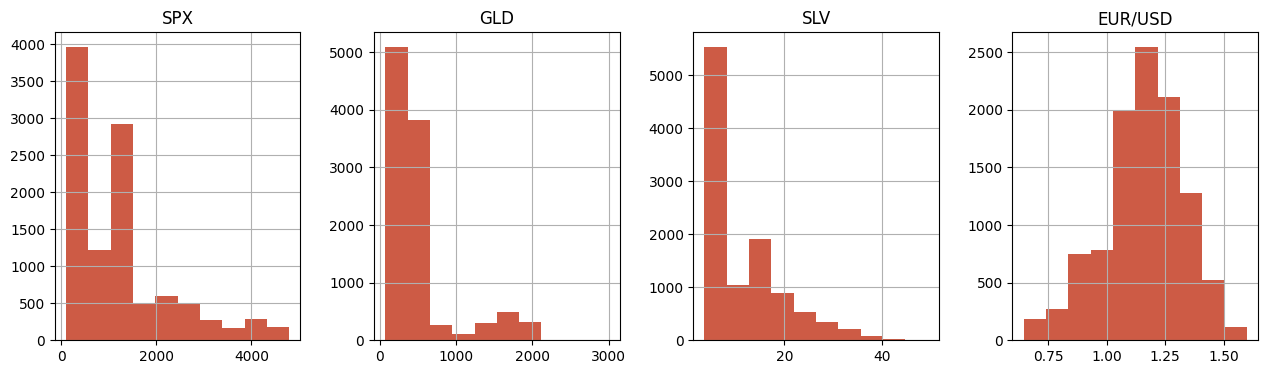

In [13]:
gold_data.hist(figsize=(32,4), layout=(1,8), color="#CD5B45");

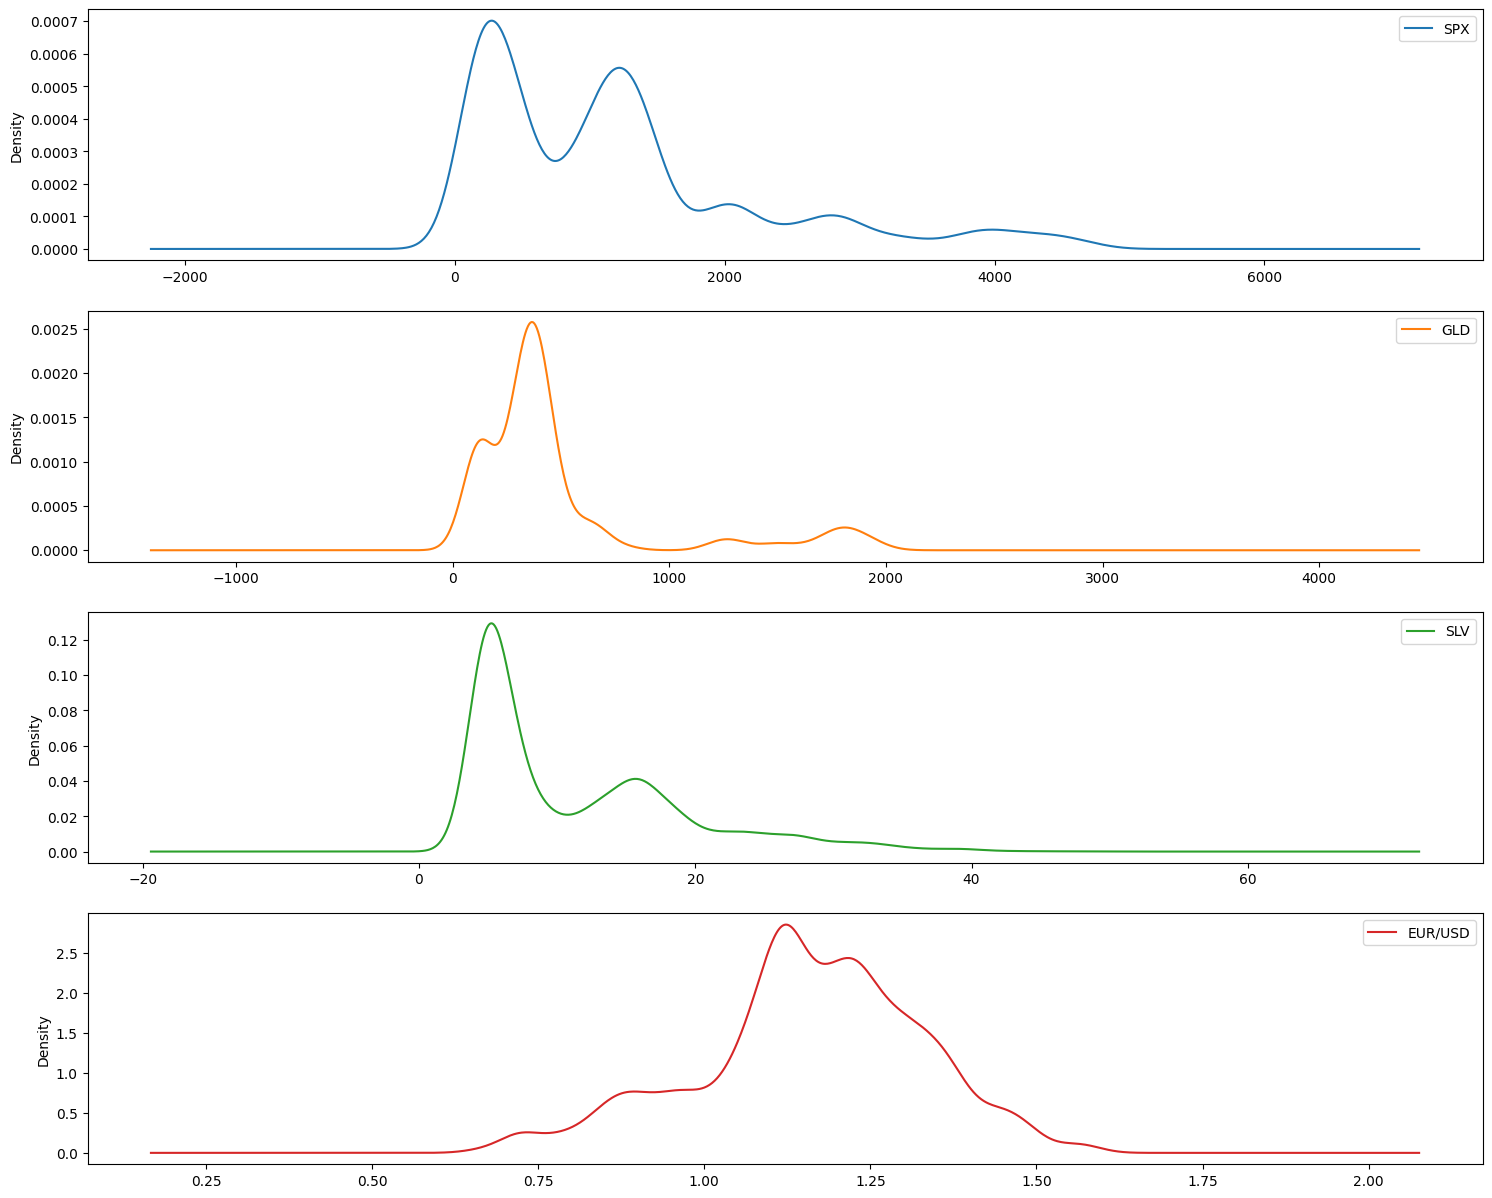

In [14]:
gold_data.plot(kind="kde", subplots=True, layout=(4,1), figsize=(18,15),sharex=False, sharey=False);

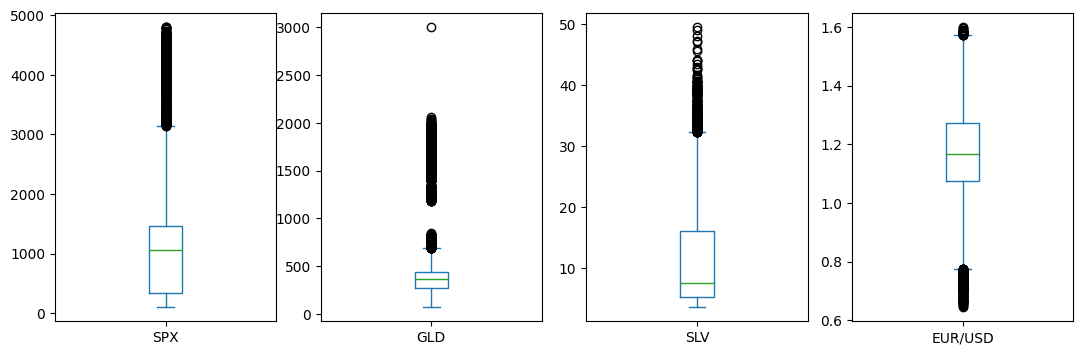

In [15]:
gold_data.plot(kind="box", subplots=True, layout=(1,6), figsize=(20,4),sharex=False, sharey=False);

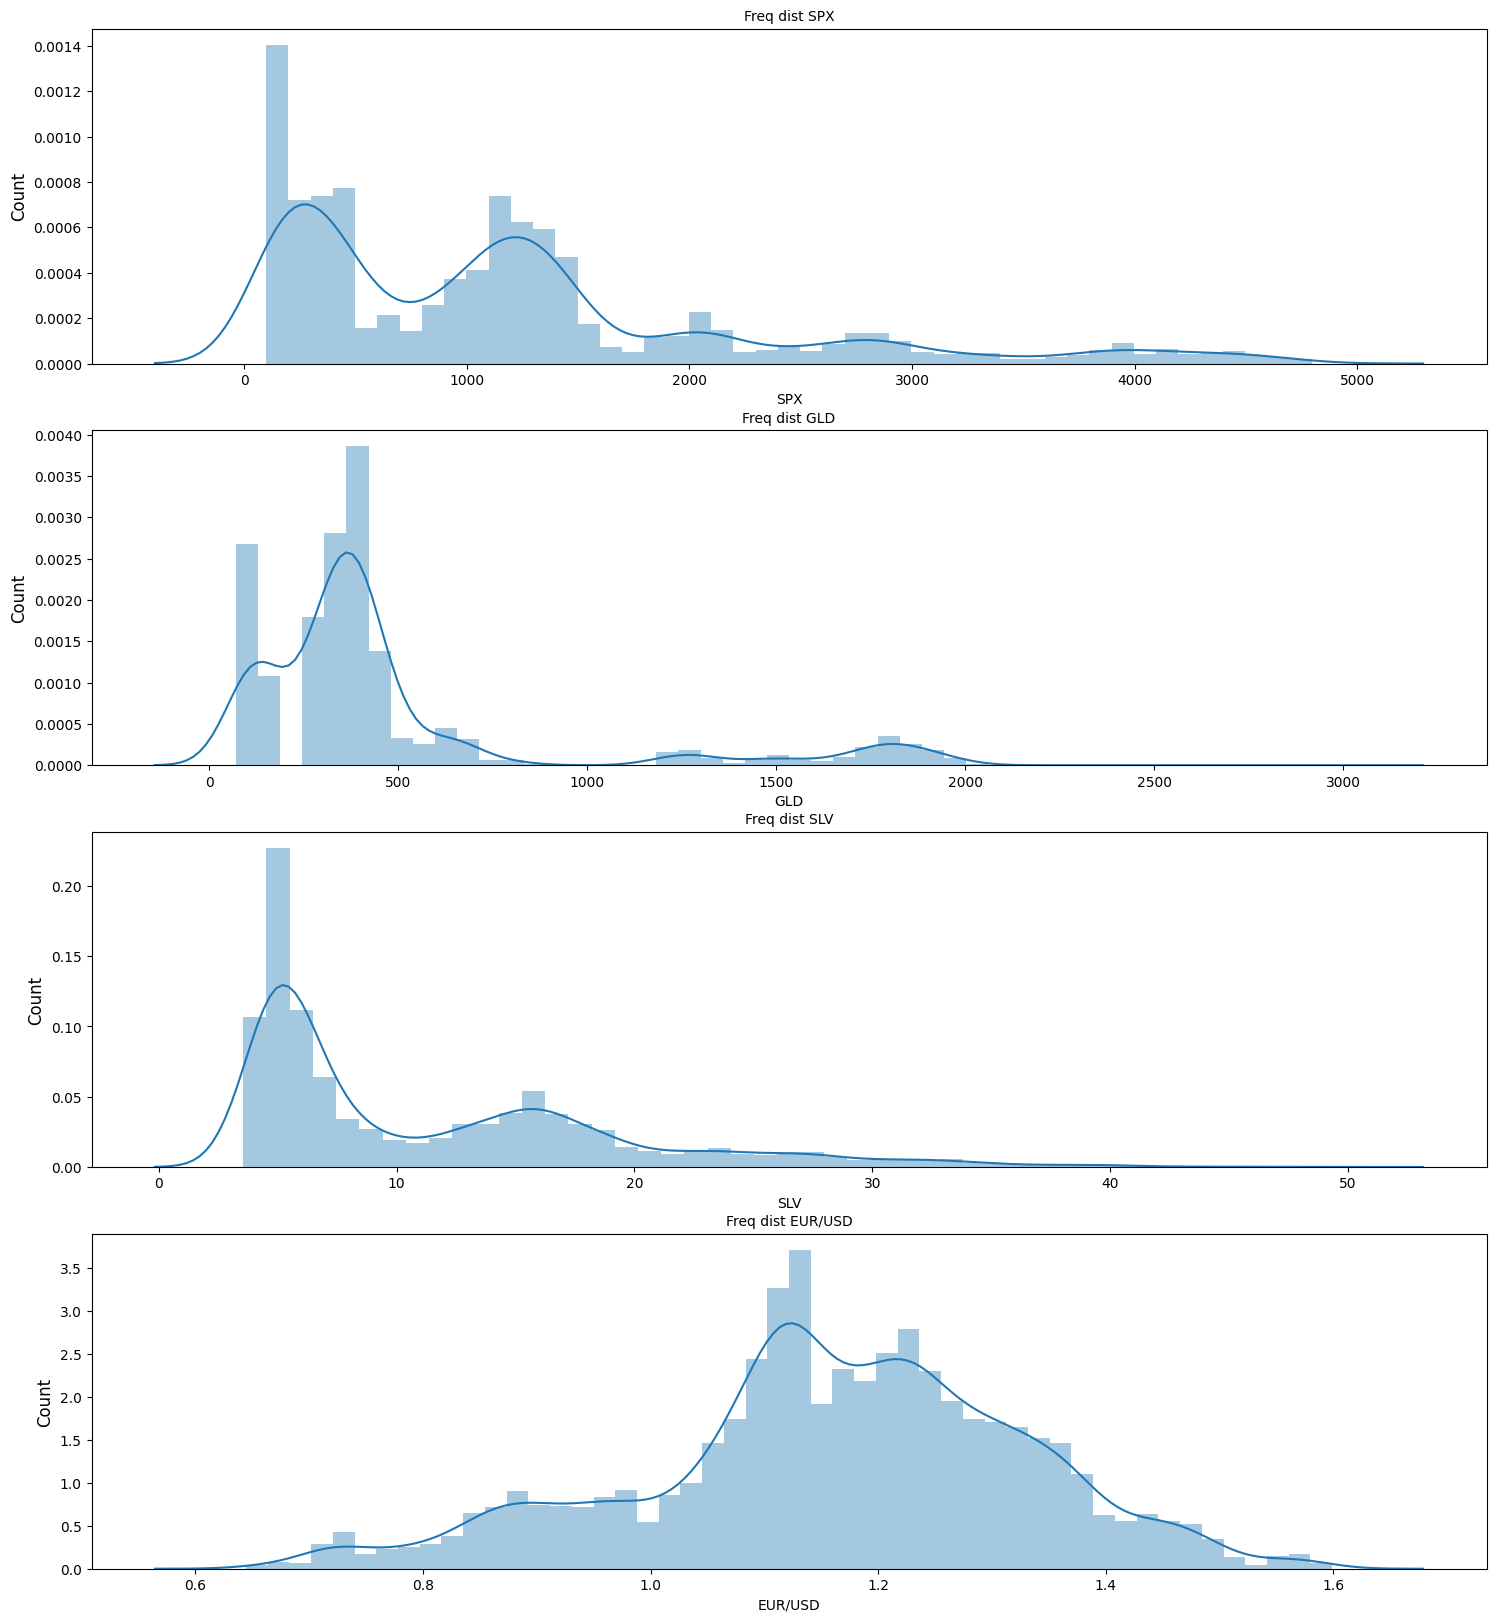

In [16]:
col_names = ['SPX','GLD', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(18,20))

for i, col_val in enumerate(col_names):

    sns.distplot(gold_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=12)

plt.show()


# **Correlation:**
 a. Positive Correlation

 b. Negative Correlation

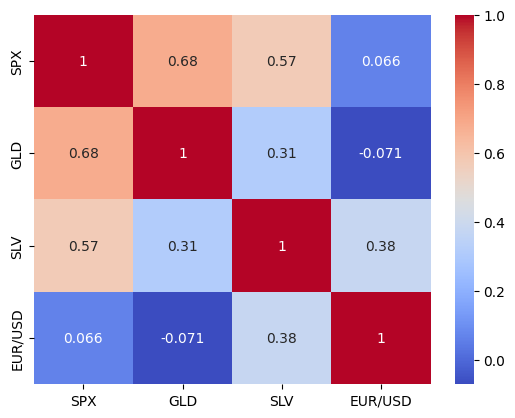

In [17]:
correlation = gold_data.iloc[:,1:].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**If Highly Correlated , then we will drop that specific column to avaid over fitting**

In [18]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.678245
GLD        1.000000
SLV        0.312375
EUR/USD   -0.071343
Name: GLD, dtype: float64


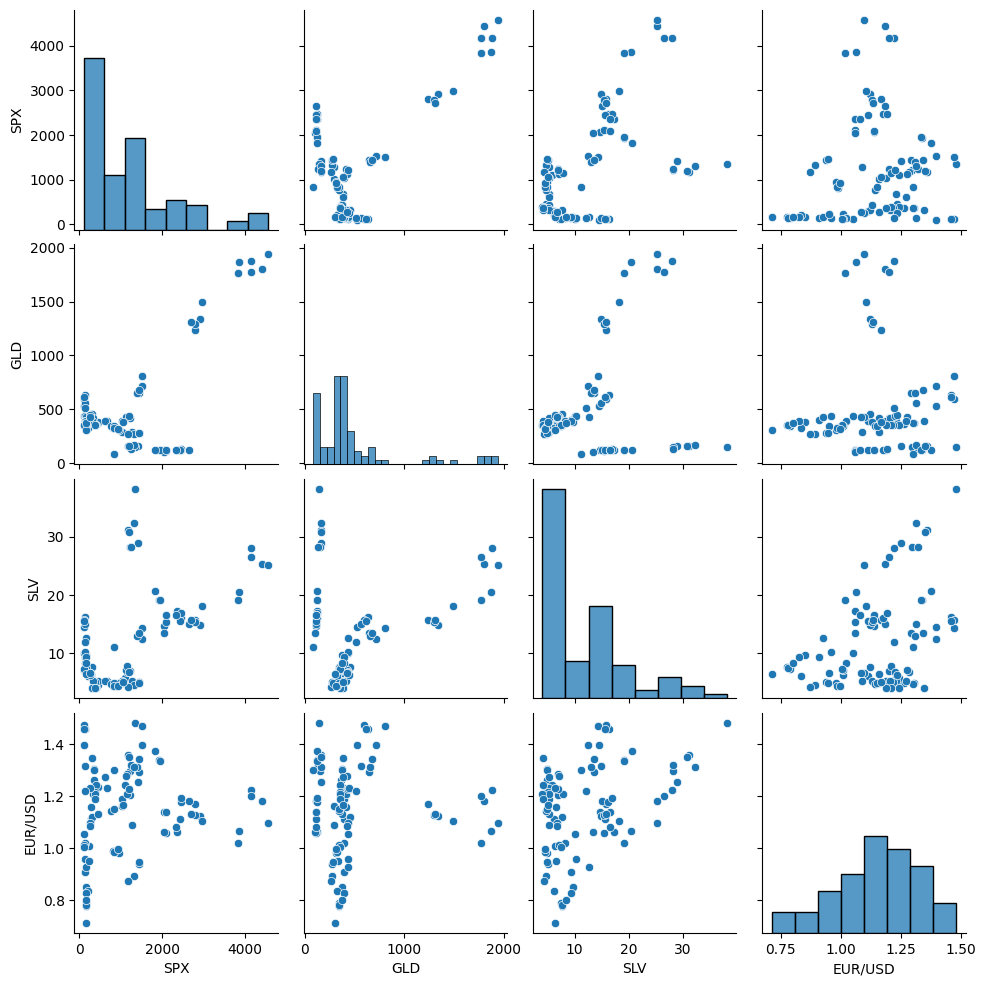

In [19]:
sns.pairplot(gold_data.sample(n=100));

<Axes: xlabel='GLD', ylabel='Density'>

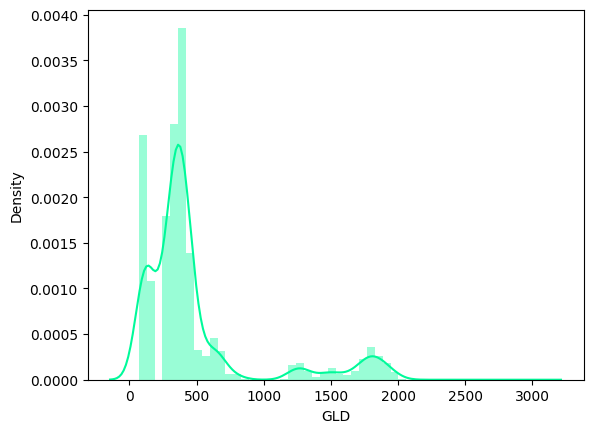

In [20]:
# checking the distribution of the GOLD Price
sns.distplot(gold_data['GLD'],color='#00FA9A')

# **Data preprocessing**

In [21]:
# Removing the rows that contains NULL values
gold_data.dropna(inplace=True)


*Using the date as an index will provide an advantage when tracking the data, thus we will first set the Date column as the dataframe's index.*

In [22]:
# reset the index to date column
gold_data.set_index("Date", inplace=True)

In [23]:
# Checking the number of missing values after removing NULL values
gold_data.isnull().sum()

SPX        0
GLD        0
SLV        0
EUR/USD    0
dtype: int64

In [24]:
# Number of rows and columns after removing NULL values
gold_data.shape

(10391, 4)

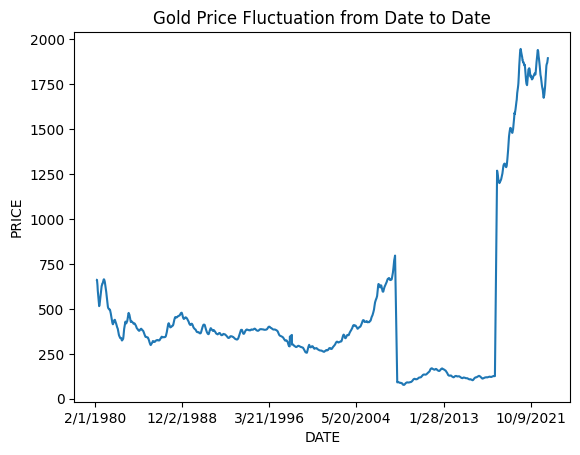

In [25]:
# plot price of gold for each increasing day (we will take an avg of 50 previous data to avaoid noise)
gold_data["GLD"].rolling(window=50).mean().plot()
plt.title("Gold Price Fluctuation from Date to Date")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

**Skewness Transformation**

*Skewness is a measure of a distribution's asymmetry. If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed. And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.*

In [26]:
# skewness along the index axis
print(gold_data.skew(axis=0, skipna=True))

SPX        1.337839
GLD        2.110643
SLV        1.263468
EUR/USD   -0.365179
dtype: float64


*The square root transforms x to x(1/2) = sqrt(x), which has a moderate effect on distribution shape.It is used to reduce right skewness.*

In [27]:
# applying saquare root transformation on the skewed dataset
gold_data["SPX"] = gold_data["SPX"].apply(lambda x: np.sqrt(x))
gold_data["GLD"] = gold_data["GLD"].apply(lambda x: np.sqrt(x))
gold_data["SLV"] = gold_data["SLV"].apply(lambda x: np.sqrt(x))

**Outlier Handling**

*Outliers are data points that differ significantly from the rest of the data in a given dataset.  It can occur as a result of  errors in Data Entry, errors in measurement, data processing, and sampling. Outliers can have a significant negative impact on our model. For example, in linear regression, if a data point is an outlier, it might introduce a very big mean square error. In EDA, removing outliers is a useful practice.*

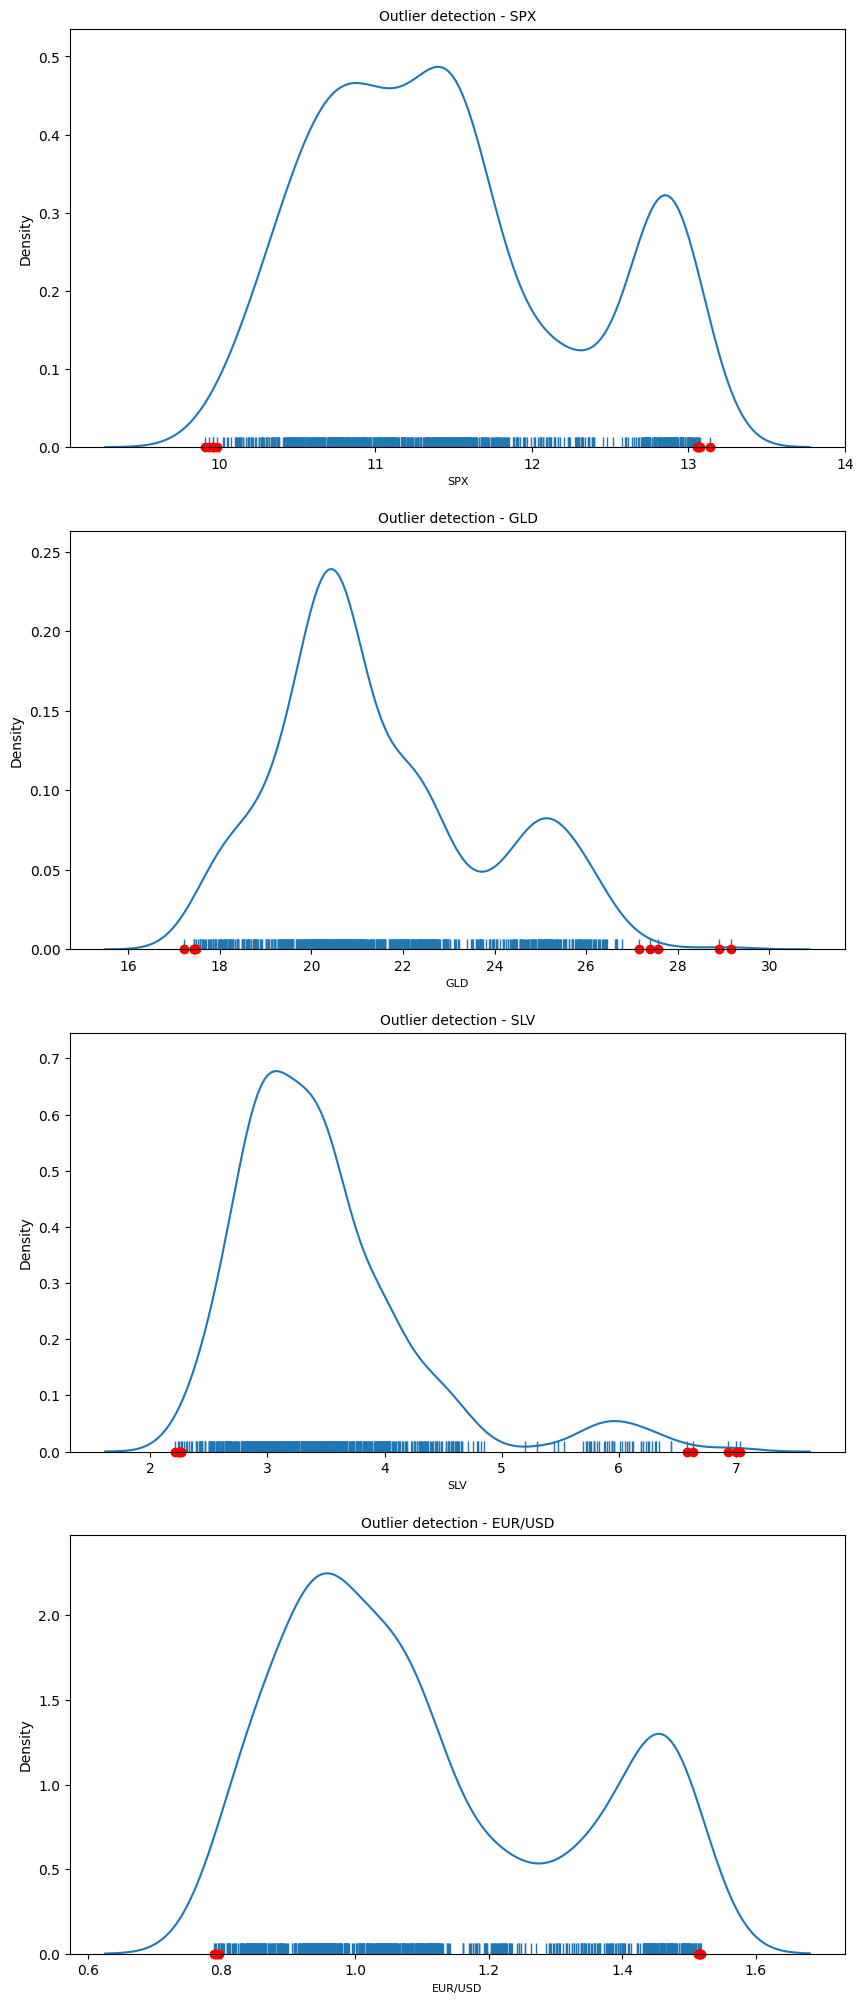

In [28]:
def percentile_based_outlier(gold_data, threshold=99):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(gold_data, [diff, 100 - diff])
    return (gold_data < minval) | (gold_data > maxval)

col_names = ['SPX','GLD', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):
    x = gold_data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

**Visualizing Outliers Using Box Plot**

*With just a box and whiskers, it efficiently and effectively represents the overview of the data. Boxplot uses the 25th, 50th, and 75th percentiles to summarize sample data. A boxplot of the dataset can provide insights (quartiles, median, and outliers) without any further work.*

<Axes: ylabel='GLD'>

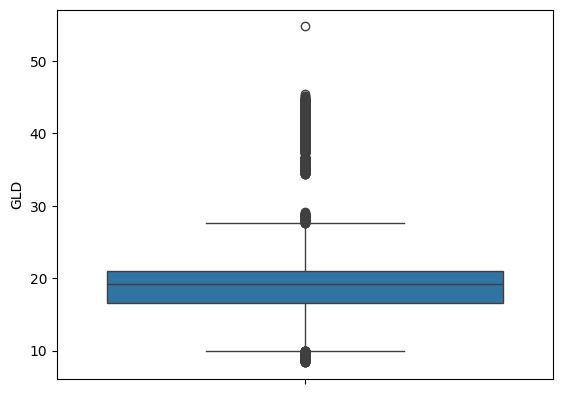

In [29]:
# Box Plot
import seaborn as sns
sns.boxplot(gold_data['GLD'])

*We can assume that numbers above 46 are operating as outliers.*

In [30]:
# Position of the Outlier
import numpy as np
print(np.where(gold_data['GLD']> 46))

(array([4471]),)


**Z-score**

*The Z- Score is also known as the standard score. This value/score indicates how far the data point deviates from the mean. After establishing a threshold value, the z score values of data points can be used to identify outliers.*

Zscore = (data_point -mean) / std. deviation

In [31]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(gold_data['GLD']))
print(z)


Date
2/1/1980     0.402828
3/1/1980     0.582814
4/1/1980     0.473019
7/1/1980     0.581643
8/1/1980     0.526046
               ...   
3/24/2023    2.859493
3/27/2023    2.830738
3/28/2023    2.851262
3/29/2023    2.839178
3/30/2023    2.859814
Name: GLD, Length: 10391, dtype: float64


*Rows with a Z value greater than 3*

In [32]:
threshold = 3

# Position of the outlier
print(np.where(z > threshold))


(array([4471]),)


Since nearly all z score values are less than 3, we have set the Z score threshold value to 3 in the current case. so that any data entry errors with a z score higher than 3 can be identified. However, none exist.

# **Splitting the Features and Target**

In [33]:
# Splitting Gold data
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [34]:
# Printing SPX, SILVER , EUR/USD data
print(X)

                 SPX       SLV  EUR/USD
Date                                   
2/1/1980   10.283968  6.320601   1.5149
3/1/1980   10.257680  6.082763   1.5177
4/1/1980   10.320853  5.722762   1.5129
7/1/1980   10.334892  6.244998   1.5168
8/1/1980   10.437912  5.789646   1.5108
...              ...       ...      ...
3/24/2023  63.015792  4.818755   1.0780
3/27/2023  63.067662  4.797176   1.0799
3/28/2023  63.018013  4.830569   1.0842
3/29/2023  63.465030  4.827360   1.0845
3/30/2023  63.646131  4.886226   1.0905

[10391 rows x 3 columns]


In [35]:
# Printing Gold data
print(Y)

Date
2/1/1980     23.653752
3/1/1980     25.179357
4/1/1980     24.248711
7/1/1980     25.169426
8/1/1980     24.698178
               ...    
3/24/2023    44.476960
3/27/2023    44.233226
3/28/2023    44.407194
3/29/2023    44.304766
3/30/2023    44.479680
Name: GLD, Length: 10391, dtype: float64


# **Splitting into Training data and Test Data**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [37]:
print(f'Train Data Shape: {X_train.shape}')
print(f'Test Data Shape: {X_test.shape}')

Train Data Shape: (8312, 3)
Test Data Shape: (2079, 3)


# **Model Implementation**

# **AdaBoost Regressor**

In [38]:
# training the model
clf = AdaBoostRegressor(n_estimators=25,random_state=42)
clf.fit(X_train, Y_train)

AdaBoostRegressor(n_estimators=25, random_state=42)

**Model Evaluation**

In [39]:
# prediction on Test Data
test_data_prediction = clf.predict(X_test)

In [40]:
print(test_data_prediction)

[18.63280719 16.56591843 14.34803291 ... 19.21106386 21.98664462
 18.63280719]


In [41]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8658856889242955


**Compare the Actual Values and Predicted Values in a Plot**

In [42]:
Y_test = list(Y_test)

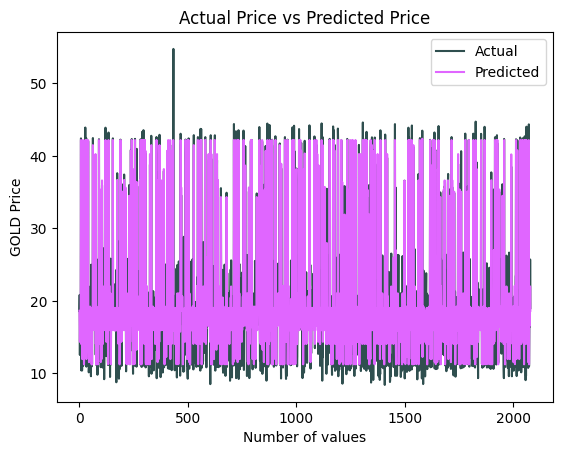

In [43]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [44]:
accuracy = clf.score(X_test, Y_test)
print( 'AdaBoost Regressor Accuracy: ', accuracy*100,'%')

AdaBoost Regressor Accuracy:  86.58856889242955 %


In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
import math

In [47]:
mae = mean_absolute_error(test_data_prediction, Y_test)

In [48]:
mae

2.1239197675034234

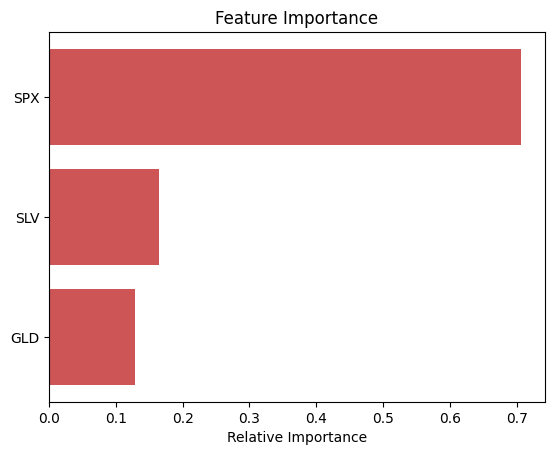

In [49]:
features = gold_data.columns

# store the importance of the feature
importances = clf.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#CD5555',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **Decision Tree Regressor**

In [50]:
# training the model
benchmark_dt = DecisionTreeRegressor( min_samples_leaf=25, max_features=1,
    random_state=42).fit(X_train, Y_train)

In [51]:
benchmark_dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_features=1, min_samples_leaf=25, random_state=42)

**Model Evaluation**

In [52]:
# prediction on Test Data
test_data_prediction = benchmark_dt.predict(X_test)

In [53]:
print(test_data_prediction)

[18.79554654 20.95347057 12.68987531 ... 16.40515452 25.89001517
 18.91754621]


In [54]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8671054512706524


**Compare the Actual Values and Predicted Values in a Plot**

In [55]:
Y_test = list(Y_test)

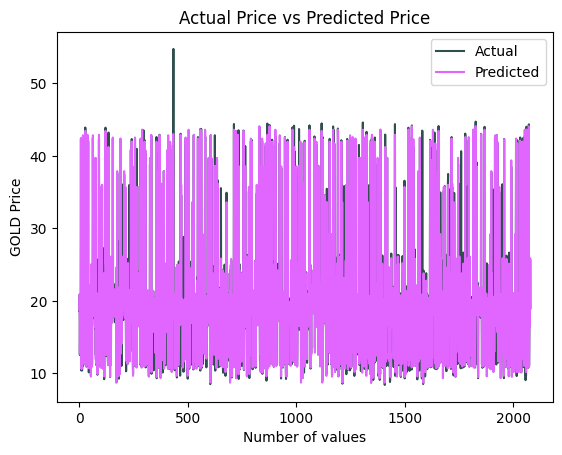

In [56]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [57]:
accuracy = benchmark_dt.score(X_test,Y_test)
print( 'Decision Tree Regressor Accuracy: ', accuracy*100,'%')

Decision Tree Regressor Accuracy:  86.71054512706525 %


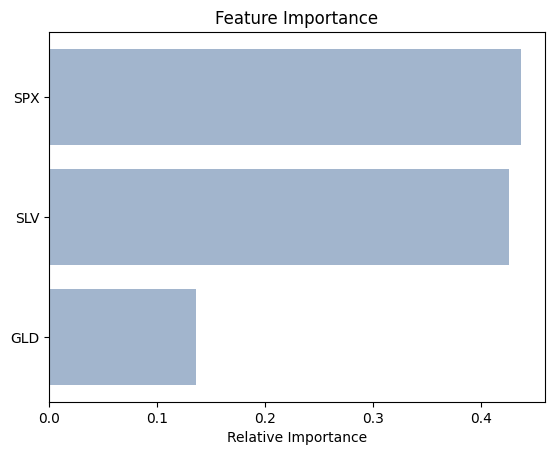

In [58]:
features = gold_data.columns

# store the importance of the feature
importances = benchmark_dt.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#A2B5CD',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **Random Forest Regressor**

In [59]:
# training the model
regressor = RandomForestRegressor(n_estimators=25, min_samples_leaf=25, max_features=1,
    random_state=42)

In [60]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_features=1, min_samples_leaf=25, n_estimators=25,
                      random_state=42)

**Model Evaluation**

In [61]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [62]:
print(test_data_prediction)

[18.76508299 20.64487534 12.72582946 ... 16.538054   23.32989848
 18.81377151]


In [63]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9243721059578628


**Compare the Actual Values and Predicted Values in a Plot**

In [64]:
Y_test = list(Y_test)

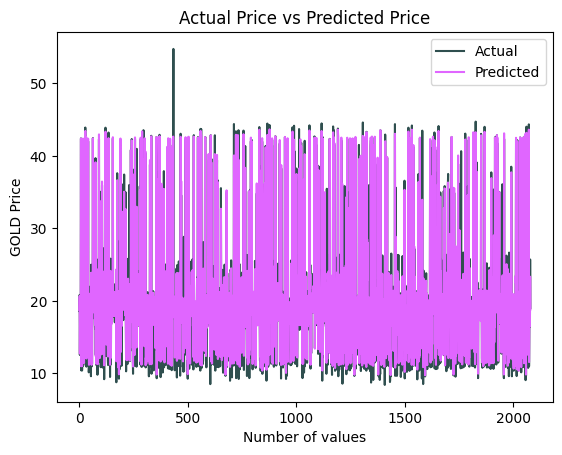

In [65]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [66]:
accuracy = regressor.score(X_test,Y_test)
print( 'Random Forest Accuracy: ', accuracy*100,'%')

Random Forest Accuracy:  92.43721059578628 %


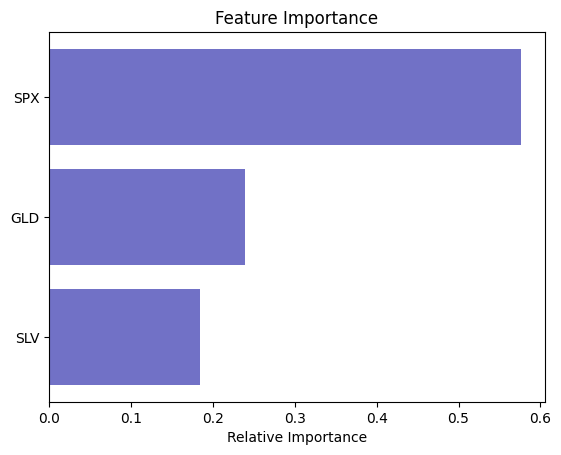

In [67]:
features = gold_data.columns

# store the importance of the feature
importances = regressor.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#7171C6',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **GradientBoost Regressor**

In [68]:
# training the model
gbr = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)

gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_features=1, min_samples_leaf=25, n_estimators=25,
                          random_state=42, subsample=0.5)

**Model Evaluation**

In [69]:
# prediction on Test Data
test_data_prediction = gbr.predict(X_test)

In [70]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8092692104962222


**Compare the Actual Values and Predicted Values in a Plot**

In [71]:
Y_test = list(Y_test)

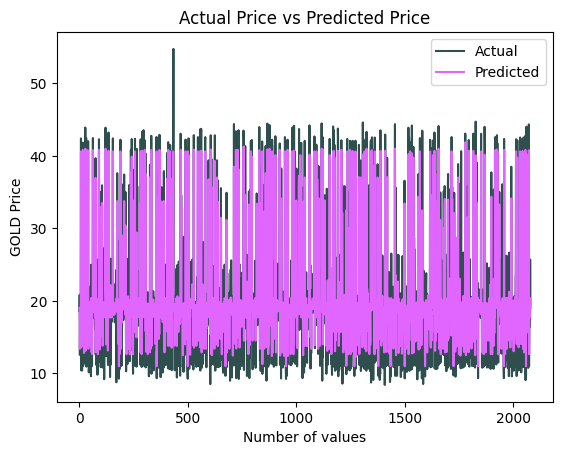

In [72]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [73]:
accuracy = gbr.score(X_test,Y_test)
print( 'GradientBoost Regressor Accuracy: ', accuracy*100,'%')

GradientBoost Regressor Accuracy:  80.92692104962222 %


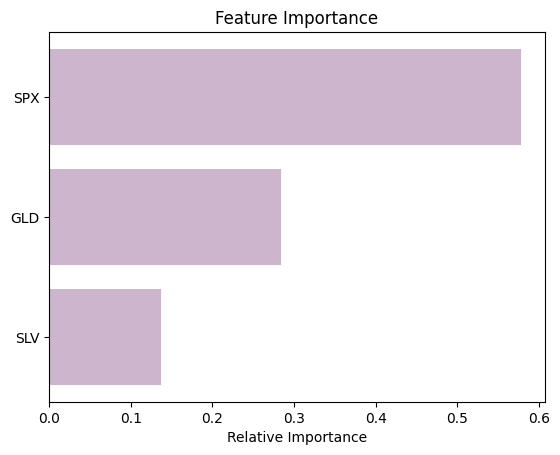

In [74]:
features = gold_data.columns

# store the importance of the feature
importances = gbr.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#CDB5CD',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **ExtraTrees Regressor**

In [75]:
# training the model
ext_reg = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=25, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,random_state=None,max_samples=None)
ext_reg.fit(X_train, Y_train)

ExtraTreesRegressor(min_samples_leaf=25, min_samples_split=5)

**Model Evaluation**

In [76]:
# prediction on Test Data
test_data_prediction = ext_reg.predict(X_test)

In [77]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9466331288156953


**Compare the Actual Values and Predicted Values in a Plot**

In [78]:
Y_test = list(Y_test)

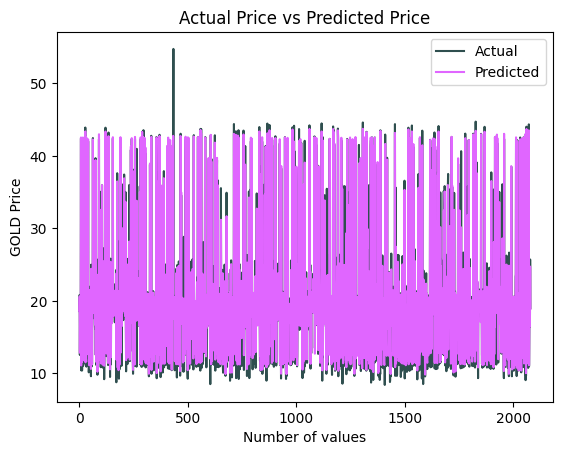

In [79]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [80]:
accuracy = ext_reg.score(X_test,Y_test)
print( 'ExtraTrees Regressor Accuracy: ', accuracy*100,'%')

ExtraTrees Regressor Accuracy:  94.66331288156952 %


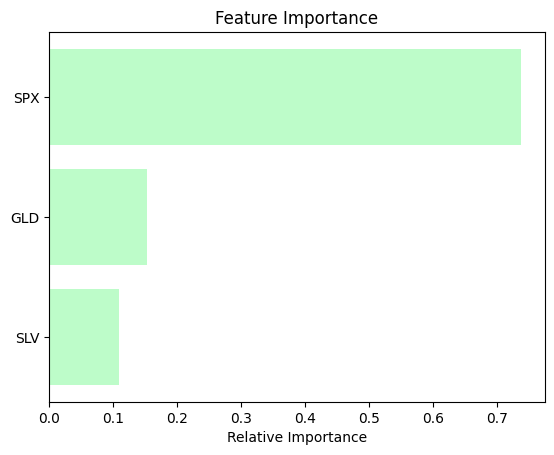

In [81]:
features = gold_data.columns

# store the importance of the feature
importances = ext_reg.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#BDFCC9',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **Staked Generalization**

In [82]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
# training the model
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [84]:

reg.fit(X_train, Y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

**Model Evaluation**

In [85]:
# prediction on Test Data
test_data_prediction = reg.predict(X_test)

In [86]:
 #R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9266834698140374


**Compare the Actual Values and Predicted Values in a Plot**

In [87]:
Y_test = list(Y_test)

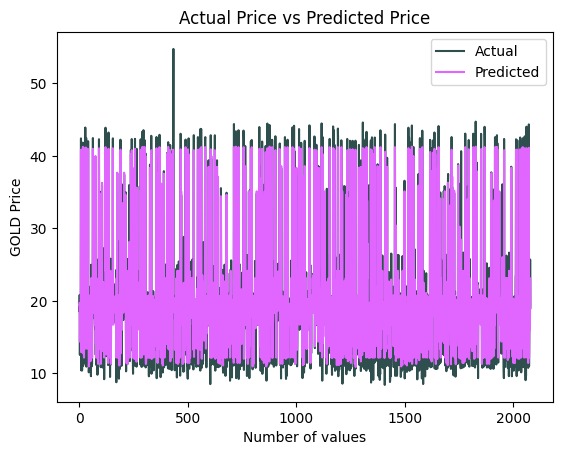

In [88]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [89]:
accuracy = reg.score(X_test,Y_test)
print( 'Staked Generalization Accuracy: ', accuracy*100,'%')

Staked Generalization Accuracy:  92.66834698140374 %


# **Voting Regressor**

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt


In [91]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train,Y_train)

**Model Evaluation**

In [92]:
# prediction on Test Data
test_data_prediction = ereg.predict(X_test)

In [93]:
print(test_data_prediction)

[17.57418126 20.28165146 15.39835815 ... 19.08076348 23.76749391
 18.10611115]


In [94]:
 #R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8723823320939108


**Compare the Actual Values and Predicted Values in a Plot**

In [95]:
Y_test = list(Y_test)

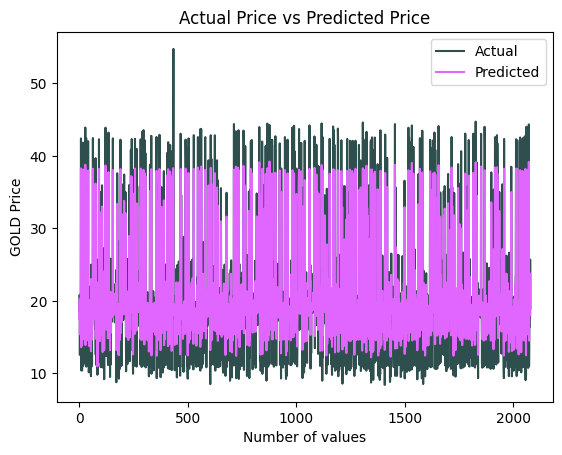

In [96]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [97]:
accuracy = ereg.score(X_test,Y_test)
print( 'Voting Regressor Accuracy: ', accuracy*100,'%')

Voting Regressor Accuracy:  87.23823320939108 %


# **Support Vector Regression**

In [98]:
svr = SVR(kernel='rbf', gamma=0.08, epsilon=0.0)

svr.fit(X_train,Y_train)

SVR(epsilon=0.0, gamma=0.08)

In [99]:
# prediction on Test Data
test_data_prediction = svr.predict(X_test)
print(test_data_prediction)


[18.62385054 20.9715753  13.71400732 ... 15.83276562 25.12564866
 18.62270232]


In [100]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8613548783745957


In [101]:
Y_test = list(Y_test)

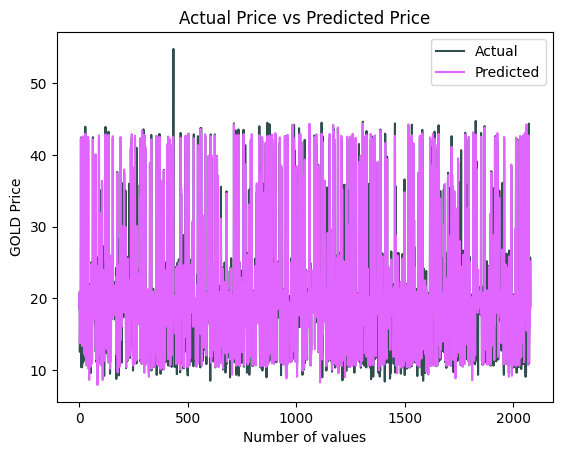

In [102]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [103]:
accuracy = svr.score(X_test,Y_test)
print( 'Support Vector Regression Accuracy: ', accuracy*100,'%')

Support Vector Regression Accuracy:  86.13548783745956 %


# **XGB Regressor**

In [104]:
xgb = XGBRegressor(n_estimators=100, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_features=1,
             max_leaves=None, min_child_weight=None, min_samples_leaf=25,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)

In [105]:
# prediction on Test Data
test_data_prediction = xgb.predict(X_test)
print(test_data_prediction)

[18.611708 21.32635  12.648478 ... 16.438654 26.05223  18.847767]


In [106]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9762623316616882


In [107]:
Y_test = list(Y_test)

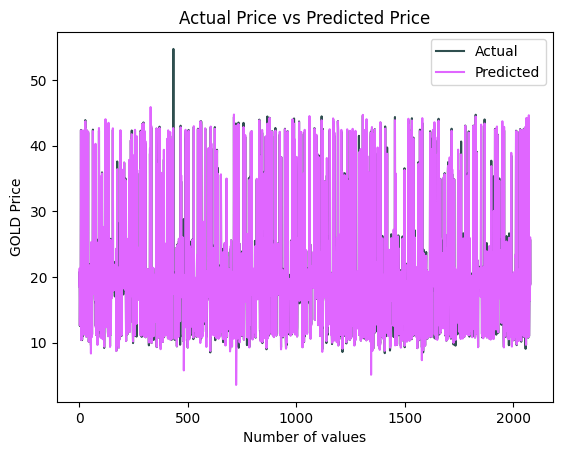

In [108]:
plt.plot(Y_test, color='#2F4F4F', label = 'Actual')
plt.plot(test_data_prediction, color='#E066FF', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

In [109]:
accuracy = xgb.score(X_test,Y_test)
print( 'eXtreme Gradient Boosting Accuracy: ', accuracy*100,'%')

eXtreme Gradient Boosting Accuracy:  97.62623316616882 %


In [110]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error between the actual and predicted values
mse = mean_squared_error(Y_test, test_data_prediction)

# Print the mean squared error
print(f"Mean squared error: {mse}")

Mean squared error: 1.633404877867805


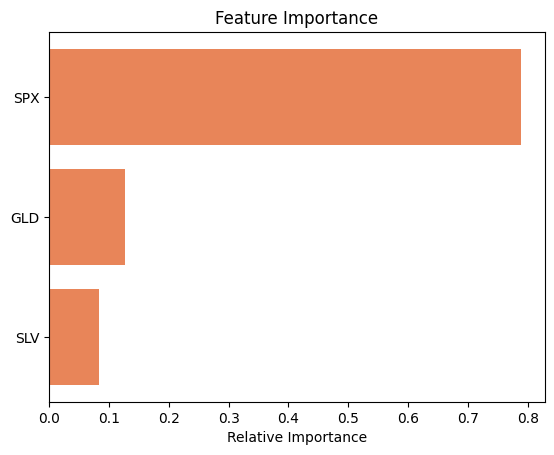

In [111]:
features = gold_data.columns

# store the importance of the feature
importances = xgb.\
	feature_importances_


indices = np.argsort(importances)

# title of the graph
plt.title('Feature Importance')

plt.barh(range(len(indices)),
		importances[indices],
		color='#e88559',
		align='center')

# plot bar chart
plt.yticks(range(len(indices)),
		[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **Overview of All Model Accuracy:**

In [112]:
  print("*"*20, "Accuracy", "*"*20)
accuracy = clf.score(X_test,Y_test)
print( 'AdaBoost Regressor Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = benchmark_dt.score(X_test,Y_test)
print( 'Decision Tree Regressor Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = regressor.score(X_test,Y_test)
print( 'Random Forrest Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = gbr.score(X_test,Y_test)
print( 'GradientBoost Regressor Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = xgb.score(X_test,Y_test)
print( 'XGBoosting Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = ext_reg.score(X_test,Y_test)
print( 'ExtraTrees Regressor Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = svr.score(X_test,Y_test)
print( 'Support Vector Regression Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = ereg.score(X_test,Y_test)
print( 'Voting Regressor Accuracy: ', accuracy*100,'%')
print("-"*50)

accuracy = reg.score(X_test,Y_test)
print( 'Staked Generalization Accuracy: ', accuracy*100,'%')
print("-"*50)





******************** Accuracy ********************
AdaBoost Regressor Accuracy:  86.58856889242955 %
--------------------------------------------------
Decision Tree Regressor Accuracy:  86.71054512706525 %
--------------------------------------------------
Random Forrest Accuracy:  92.43721059578628 %
--------------------------------------------------
GradientBoost Regressor Accuracy:  80.92692104962222 %
--------------------------------------------------
XGBoosting Accuracy:  97.62623316616882 %
--------------------------------------------------
ExtraTrees Regressor Accuracy:  94.66331288156952 %
--------------------------------------------------
Support Vector Regression Accuracy:  86.13548783745956 %
--------------------------------------------------
Voting Regressor Accuracy:  87.23823320939108 %
--------------------------------------------------
Staked Generalization Accuracy:  92.66834698140374 %
--------------------------------------------------


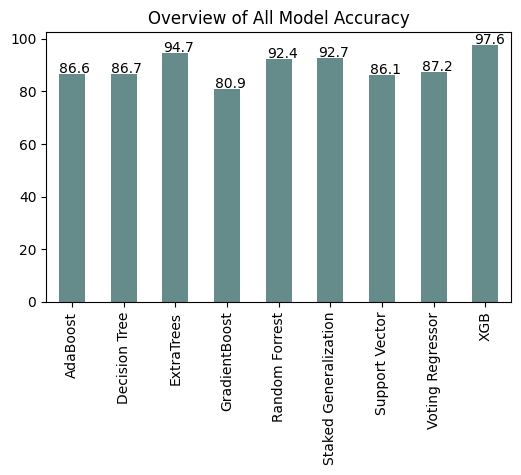

In [113]:
metric_val = {
    "ACCURACY": {
    "AdaBoost": clf.score(X_test,Y_test)*100,
    "Decision Tree": benchmark_dt.score(X_test,Y_test)*100,
    "Random Forrest": regressor.score(X_test,Y_test)*100,
    "GradientBoost": gbr.score(X_test,Y_test)*100,
    "ExtraTrees": ext_reg.score(X_test,Y_test)*100,
    "XGB": xgb.score(X_test,Y_test)*100,
    'Support Vector': svr.score(X_test, Y_test)*100,
    "Voting Regressor": ereg.score(X_test,Y_test)*100,
    "Staked Generalization": reg.score(X_test,Y_test)*100,
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar",
                             figsize = (6,3.5),
                             legend =False,
                             title = "Overview of All Model Accuracy",
                             color = '#668B8B');

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))